Time Series Analysis

- It is a statistical technique used to analyze and understand data points collected over time. 
- It involves studying patterns, trends, and underlying structures within the time series data to make predictions or gain insights.
- Time Series data is typically collected at regular intervals, such as daily, hourly, weekly, monthly, or yearly. 
- It can be found in various fields, including finance, economics, engineering, weather forecasting, and many others. 

Time series data
- It consists of observations or measurements collected over successive time intervals. It can be univariate (1 variable) or multivariate (multiple variables measured over time).

Trend
- The long-term movement or direction of the time series data, showing the underlying growth or decline over time. 
- Trends can be upward (increasing) or downward (decreasing) or stable.

Seasonality 
- Regular and predictable patterns that occur at fixed intervals within the time series. 
- Seasonality is often related to calendar or natural events and can be daily, weekly, monthly, or yearly. 

Seasonal Decomposition
- The process of breaking down a time series into its constituent components such as trend, seasonality and residuals (random fluctuations)

Autocorrelation 
- It measures the relationship between a time series and a lagged version of itself. It helps identify patterns and dependencies in the data. 

Lag
- In time series analysis, a lag refers to the time delay between 2 data points.
- A lagged time series can be useful for understanding how past values influence future ones. 

Forecasting 
- The process of predicting future values of a time series based on historical data and identified patterns or models. 


Autoregressive Integrated Moving Average (ARIMA)
- ARIMA is a popular time series modeling technique that combines autoregression (AR), differencing (I), and moving averages (MA) to model non-stationary data and make predictions. 

Seasonal Autoregressive Integrated Moving Average (SARIMA)
- This is an extension of ARIMA that includes seasonality in the modeling process. 

Exponential Smoothing Models
- These are used for time series forecasting, and they assign exponentially decreasing weights to past observations to give more importance to recent data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
#create a date range

date_rng = pd.date_range(start='2023-01-01',end='2023-12-31',freq='D')


In [4]:
date_rng

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [5]:
#Create a time series with random values
np.random.seed(42)
data = np.random.randn(len(date_rng))
#put index as date_rng
time_series = pd.Series(data,index=date_rng)

In [6]:
data

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
       -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
       -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
        1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
        0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
       -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
       -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
        0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
       -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
        0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
        0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
       -0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
        1.35624003, -0.07201012,  1.0035329 ,  0.36163603, -0.64

In [7]:
time_series

2023-01-01    0.496714
2023-01-02   -0.138264
2023-01-03    0.647689
2023-01-04    1.523030
2023-01-05   -0.234153
                ...   
2023-12-27    0.519347
2023-12-28    1.532739
2023-12-29   -0.108760
2023-12-30    0.401712
2023-12-31    0.690144
Freq: D, Length: 365, dtype: float64

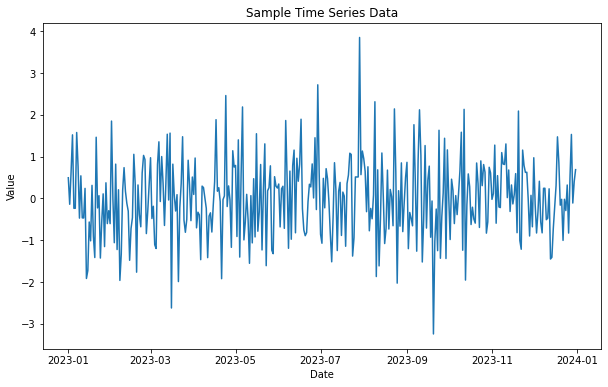

In [8]:
#plot the data
plt.figure(figsize=(10,6))
plt.plot(time_series)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Sample Time Series Data')
plt.show()

This is a non-stationary time series

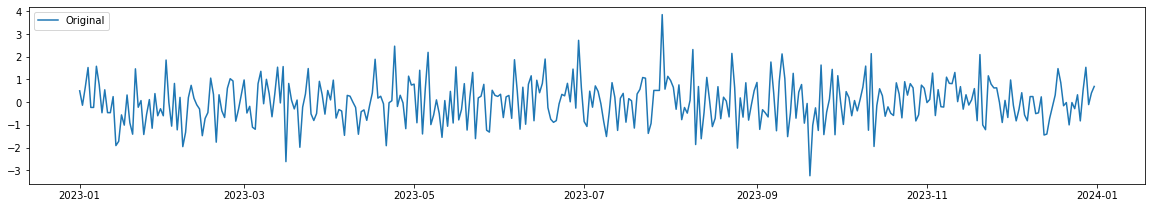

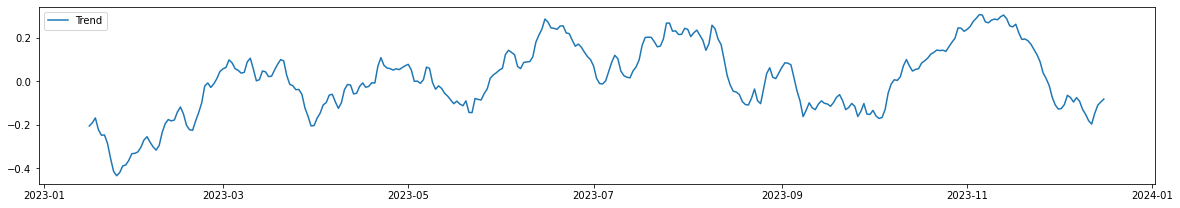

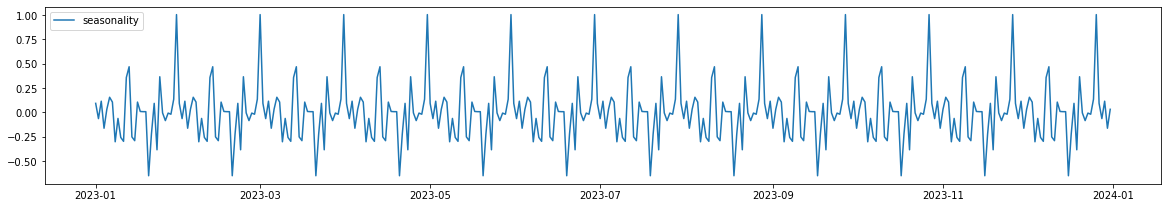

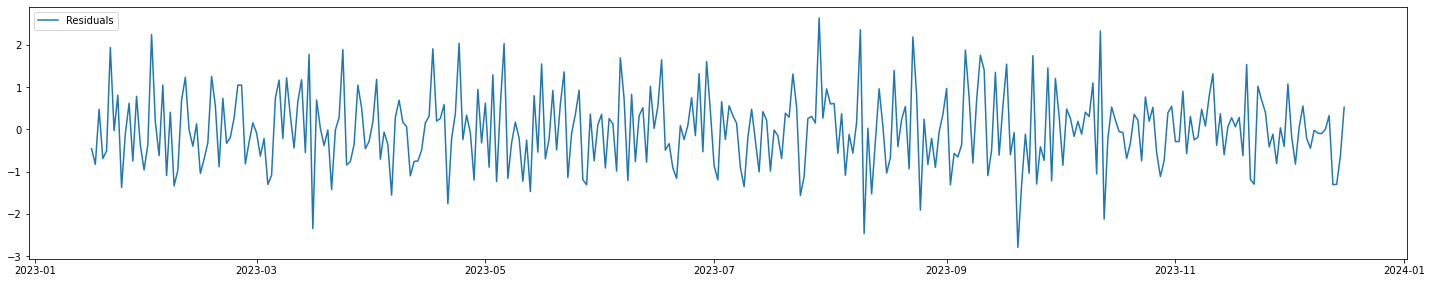

In [9]:
decomposition = sm.tsa.seasonal_decompose(time_series, model='additive',period=30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(20,15))
plt.subplot(4,1,1)
plt.plot(time_series,label='Original')
plt.legend(loc='upper left')

plt.figure(figsize=(20,15))
plt.subplot(4,1,2)
plt.plot(trend,label='Trend')
plt.legend(loc='upper left')

plt.figure(figsize=(20,15))
plt.subplot(4,1,3)
plt.plot(seasonal, label='seasonality')
plt.legend(loc='upper left')

plt.figure(figsize=(20,15))
plt.subplot(4,1,4)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [10]:
def check_stationarity(times_series):
    result = adfuller(time_series)
    print('ADF statistics:', result[0])
    print('p-value:',result[1])
    print('critical values:')
    for key,value in result[4].items():
        print(f'{key}:{value}')

In [11]:
check_stationarity(time_series)

ADF statistics: -20.237076072819963
p-value: 0.0
critical values:
1%:-3.4484434475193777
5%:-2.869513170510808
10%:-2.571017574266393


In [12]:
#Fitting ARIMA model
#ARIMA is in statsmodels.tsa.stattools
#feed the data timeseries that has index values of date and data as values
model = sm.tsa.ARIMA(time_series, order=(1,1,1))
results = model.fit()

In [13]:
#Making predictions
forecast_steps = 30
forecast = results.forecast(steps=forecast_steps)

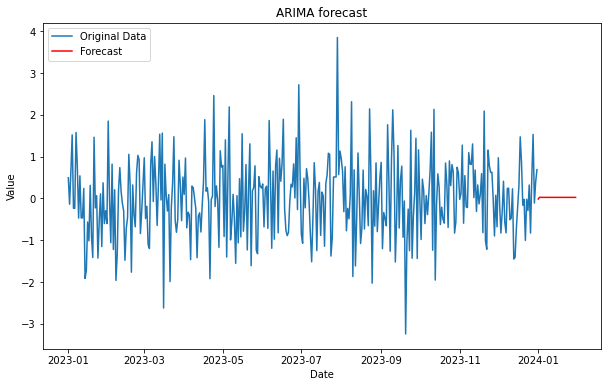

In [14]:
#visualizing the original data and the forecast
plt.figure(figsize=(10,6))
plt.plot(time_series,label='Original Data')
plt.plot(forecast,label='Forecast',color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA forecast')
plt.legend(loc='upper left')
plt.show()

In [15]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#Fitting exponential smoothing model
model = ExponentialSmoothing(time_series, seasonal='add',seasonal_periods=30)

In [16]:
model

In [17]:
#Making predictions
forecast_steps = 30
forecast1 = results.forecast(steps=forecast_steps)

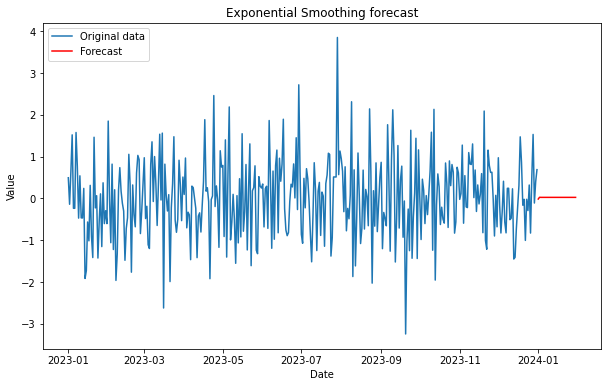

In [18]:
#Visualizing the original data and the forecast

plt.figure(figsize=(10,6))
plt.plot(time_series,label='Original data')
plt.plot(forecast1,label='Forecast',color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Exponential Smoothing forecast')
plt.legend(loc='upper left')
plt.show()

Bitcoin historical dataset

In [19]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
#import time series analysis libraries
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [21]:
df = pd.read_csv('BTC-2021min.csv')
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646106180,2022-03-01 03:43:00,BTC/USD,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000
1,1646106060,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021
2,1646106000,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
3,1646105940,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268
4,1646105880,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610782 entries, 0 to 610781
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   unix        610782 non-null  int64  
 1   date        610782 non-null  object 
 2   symbol      610782 non-null  object 
 3   open        610782 non-null  float64
 4   high        610782 non-null  float64
 5   low         610782 non-null  float64
 6   close       610782 non-null  float64
 7   Volume BTC  610782 non-null  float64
 8   Volume USD  610782 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 41.9+ MB


In [23]:
#convert date column to datetime object
df['date'] = pd.to_datetime(df['date'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610782 entries, 0 to 610781
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   unix        610782 non-null  int64         
 1   date        610782 non-null  datetime64[ns]
 2   symbol      610782 non-null  object        
 3   open        610782 non-null  float64       
 4   high        610782 non-null  float64       
 5   low         610782 non-null  float64       
 6   close       610782 non-null  float64       
 7   Volume BTC  610782 non-null  float64       
 8   Volume USD  610782 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 41.9+ MB


In [25]:
#set date as index
df.set_index('date',inplace=True)

In [26]:
df.head()

,unix,symbol,open,high,low,close,Volume BTC,Volume USD
date,,,,,,,,
2022-03-01 03:43:00,1646106180,BTC/USD,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000
2022-03-01 03:41:00,1646106060,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021
2022-03-01 03:40:00,1646106000,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
2022-03-01 03:39:00,1646105940,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268
2022-03-01 03:38:00,1646105880,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143


In [30]:
#resample the data to daily frequency and forward fill missing values
data_daily = df.resample('D').ffill()

In [31]:
data_daily

,unix,symbol,open,high,low,close,Volume BTC,Volume USD
date,,,,,,,,
2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-02,1.609546e+09,BTC/USD,29410.77,29410.77,29381.78,29381.78,9.352247,274785.671499
2021-01-03,1.609632e+09,BTC/USD,32216.51,32278.89,32183.91,32243.30,7.543440,243225.402499
2021-01-04,1.609718e+09,BTC/USD,33068.83,33109.16,33063.23,33109.16,2.027990,67145.030489
2021-01-05,1.609805e+09,BTC/USD,32054.23,32120.70,32047.68,32120.70,19.305649,620110.967864
...,...,...,...,...,...,...,...,...
2022-02-25,1.645747e+09,BTC/USD,38360.93,38399.56,38360.93,38399.56,0.025647,984.829675
2022-02-26,1.645834e+09,BTC/USD,39242.64,39244.20,39214.35,39243.85,0.038953,1528.684919
2022-02-27,1.645920e+09,BTC/USD,39146.66,39146.66,39120.72,39138.89,0.319990,12524.071024


In [32]:
data_daily.isna().sum()

unix          1
symbol        1
open          1
high          1
low           1
close         1
Volume BTC    1
Volume USD    1
dtype: int64

In [33]:
data_daily.dropna(inplace=True)

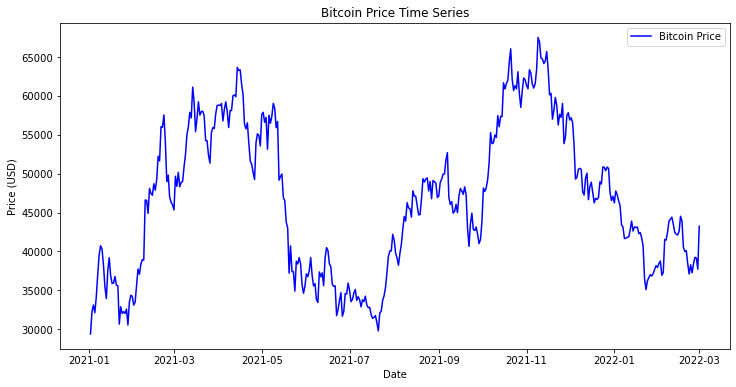

In [35]:
#plot the bitcoin prices over time
plt.figure(figsize=(12,6))
plt.plot(data_daily.index,data_daily['close'],label='Bitcoin Price',color='b')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Price Time Series')
plt.legend()
plt.show()

In [37]:
#Decompose the time seriers into trend, seasonality, and residuals
decomposition = seasonal_decompose(data_daily['close'],model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

Text(0.5, 1.0, 'Residual time series')

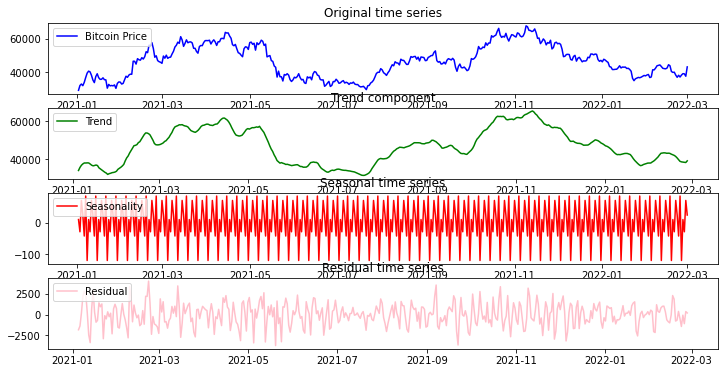

In [40]:
#plot the decomposed components
plt.figure(figsize=(12,6))
plt.subplot(4,1,1)
plt.plot(data_daily.index,data_daily['close'],label='Bitcoin Price',color='b')
plt.legend(loc='upper left')
plt.title('Original time series')
plt.subplot(4,1,2)
plt.plot(data_daily.index,trend,label='Trend',color='g')
plt.legend(loc='upper left')
plt.title('Trend component')
plt.subplot(4,1,3)
plt.plot(data_daily.index,seasonal,label='Seasonality',color='r')
plt.legend(loc='upper left')
plt.title('Seasonal time series')
plt.subplot(4,1,4)
plt.plot(data_daily.index,residual,label='Residual',color='pink')
plt.legend(loc='upper left')
plt.title('Residual time series')

In [46]:
#check stationarity using augmented dickey-ruller test
from statsmodels.tsa.stattools import adfuller

def check_stationarity(time_series):
    results = adfuller(time_series)
    print("ADF statistic:",results[0])
    print("p-value:",results[1])
    print("critical values:")
    for key,value in results[4].items():
        print(f"{key}:{value}")

In [47]:
#perform differencing to make the time series stationary
data_daily['Price_diff'] = data_daily['close'] - data_daily['close'].shift(1)
data_daily.dropna(inplace=True)

#check stationarity of the diferenced series
check_stationarity(data_daily['Price_diff'])

ADF statistic: -20.99080784724793
p-value: 0.0
critical values:
1%:-3.4460536145702383
5%:-2.868462751982839
10%:-2.570457599182051


In [48]:
data_daily

,unix,symbol,open,high,low,close,Volume BTC,Volume USD,Price_diff
date,,,,,,,,,
2021-01-06,1.609891e+09,BTC/USD,34081.24,34134.69,34081.24,34124.99,3.119639,106457.658892,2004.29
2021-01-07,1.609978e+09,BTC/USD,36875.96,36989.33,36875.96,36974.24,14.808354,547527.623709,2849.25
2021-01-08,1.610064e+09,BTC/USD,39510.59,39587.08,39510.59,39555.76,5.935156,234769.624099,2581.52
2021-01-09,1.610150e+09,BTC/USD,40682.76,40746.69,40651.64,40728.34,2.607264,106189.540364,1172.58
2021-01-10,1.610237e+09,BTC/USD,40239.06,40350.10,40239.06,40318.63,13.189319,531775.279567,-409.71
...,...,...,...,...,...,...,...,...,...
2022-02-25,1.645747e+09,BTC/USD,38360.93,38399.56,38360.93,38399.56,0.025647,984.829675,1155.34
2022-02-26,1.645834e+09,BTC/USD,39242.64,39244.20,39214.35,39243.85,0.038953,1528.684919,844.29
2022-02-27,1.645920e+09,BTC/USD,39146.66,39146.66,39120.72,39138.89,0.319990,12524.071024,-104.96


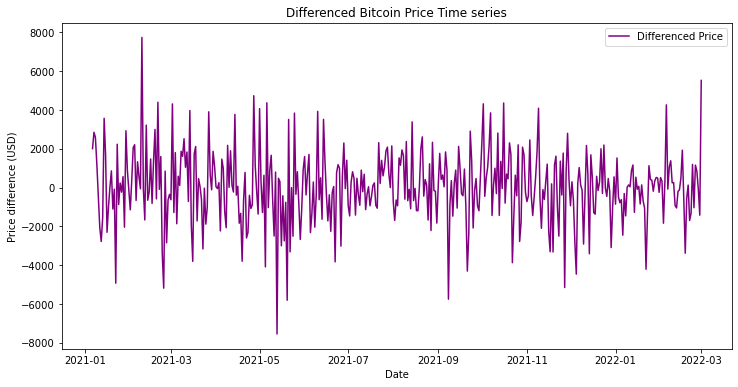

In [50]:
#Plot the differenced time series
plt.figure(figsize=(12,6))
plt.plot(data_daily.index,data_daily['Price_diff'],label='Differenced Price', color='Purple')
plt.xlabel('Date')
plt.ylabel('Price difference (USD)')
plt.title('Differenced Bitcoin Price Time series')
plt.legend()
plt.show()

In [51]:
#Split the dataset into train and test sets
train_size = int(len(data_daily)*0.8)
train,test = data_daily.iloc[:train_size],data_daily.iloc[train_size:]

SARIMA (Seasonal Autoregressive Integrated Moving Average)

- SARIMA is an extension of the ARIMA model that includes seasonal component.
- The model is suitable for time series data that exhibit both trend and seasonality. It consists of 3 main components: Autoregression (AR), differencing (I) and moving average (MA).
- It includes seasonal component (S) represented by seasonal_order

In [52]:
#build the SARIMA model
#(1,1,1) order has the values of AR, I and MA.
#(1,1,1,12) seasonal order has 12 in range of 12 months
sarima_model = SARIMAX(train['close'],order=(1,1,1),seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit()

In [53]:
#forecast the future values
forecast = sarima_result.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean

In [54]:
forecast_mean

2021-12-08    51803.501691
2021-12-09    51031.848744
2021-12-10    51112.803621
2021-12-11    51767.100000
2021-12-12    51713.412638
                  ...     
2022-02-25    59470.027906
2022-02-26    59369.329144
2022-02-27    59422.281809
2022-02-28    59674.170454
2022-03-01    59858.510014
Freq: D, Name: predicted_mean, Length: 84, dtype: float64

In [55]:
#calculate mean squared error (MSE) to evaluate the model
mse = mean_squared_error(test['close'],forecast_mean)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 187105450.05669433


In [57]:
rmse = np.sqrt(mse)
rmse

13678.64942370753

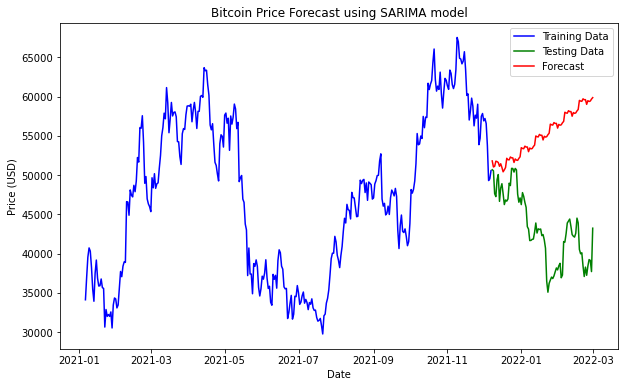

In [60]:
#plot the forecasted values
plt.figure(figsize=(10,6))
plt.plot(train.index,train['close'],label='Training Data',color='b')
plt.plot(test.index,test['close'],label='Testing Data',color='g')
plt.plot(test.index,forecast_mean,label='Forecast',color='r')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Price Forecast using SARIMA model')
plt.legend()
plt.show()

Exponential Smoothing 
- It is a time series forecasting method that uses weighted averages of past observations to predict future values.
- It is useful fore data with no trend or seasonality. 
- It considers the level, trend, and seasonal components, making it suitbale for data with both trend and seasonality

In [63]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [64]:
#build the ES model
exp_model = ExponentialSmoothing(train['close'],trend='add',seasonal='add',seasonal_periods=12)
exp_result = exp_model.fit()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [65]:
#forecast future values
exp_forecast = exp_result.forecast(len(test))

In [66]:
exp_forecast

2021-12-08    50264.819789
2021-12-09    49152.331019
2021-12-10    48240.720575
2021-12-11    47404.846213
2021-12-12    46190.451826
                  ...     
2022-02-25    24069.107286
2022-02-26    23976.092596
2022-02-27    24571.831473
2022-02-28    25567.214875
2022-03-01    25979.987770
Freq: D, Length: 84, dtype: float64

In [67]:
#calculate MSE to evaluate the model
exp_mse = mean_squared_error(test['close'],exp_forecast)
print(f"Exponential Smoothing Mean Square Error (MSE): {exp_mse}")

Exponential Smoothing Mean Square Error (MSE): 73256751.2926903


In [92]:
exp_rmse = np.sqrt(exp_mse)
exp_rmse

92.51494900800893

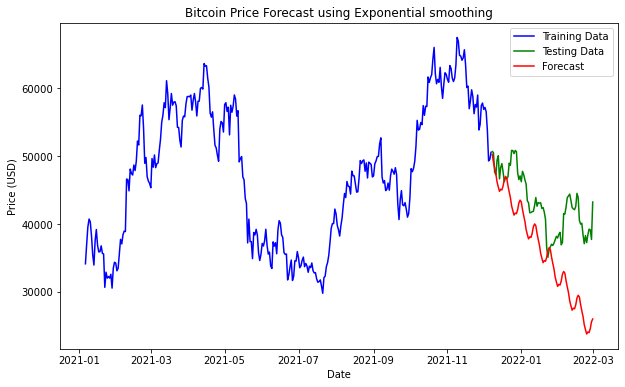

In [69]:
#plot the forecasted values
#plot the forecasted values
plt.figure(figsize=(10,6))
plt.plot(train.index,train['close'],label='Training Data',color='b')
plt.plot(test.index,test['close'],label='Testing Data',color='g')
plt.plot(test.index,exp_forecast,label='Forecast',color='r')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Price Forecast using Exponential smoothing')
plt.legend()
plt.show()

Prophet
- A time series forecasting model developed by Meta.
- It is designed to handle time series data with strong seasonal patterns and multiple seasonality.
- prophet incorporates various features like seasonality, holidays and special events. 

In [71]:
pip install prophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 2.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 1.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 695.7/695.7 kB 2.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 2.5 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 1.3 MB/s eta 0:00:0000:0100:010m
  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732001 sha256=99497dc61e5087bf906671405f4677ae393838dd8145c31f5f9d4e8977550f0b
  Stored in directory: /Users/arunda/Library/Caches/pip/wheels/c2/3a/3d/11734e652782d3f823a08aae1c452e887eb16349750cca3f8a
Successfully built pymeeus

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: /opt/anaconda3/bin/python -m pip install --upg

In [72]:
from prophet import Prophet

In [73]:
#prepare data for prophet model
prophet_data = pd.DataFrame({'ds':train.index,'y':train['close']})
prophet_data

,ds,y
date,,
2021-01-06,2021-01-06,34124.99
2021-01-07,2021-01-07,36974.24
2021-01-08,2021-01-08,39555.76
2021-01-09,2021-01-09,40728.34
2021-01-10,2021-01-10,40318.63
...,...,...
2021-12-03,2021-12-03,56569.87
2021-12-04,2021-12-04,53766.95
2021-12-05,2021-12-05,49304.32


In [74]:
#build and fit the prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_data)

18:58:52 - cmdstanpy - INFO - Chain [1] start processing
18:58:55 - cmdstanpy - INFO - Chain [1] done processing


In [76]:
#create a dataframe for future predictions
future = prophet_model.make_future_dataframe(periods=len(test))

In [77]:
future

,ds
0,2021-01-06
1,2021-01-07
2,2021-01-08
3,2021-01-09
4,2021-01-10
...,...
415,2022-02-25
416,2022-02-26
417,2022-02-27
418,2022-02-28


In [78]:
#forecast future values
prophet_forecast = prophet_model.predict(future)
prophet_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-06,33941.279269,27742.318877,39936.557058,33941.279269,33941.279269,-77.324724,-77.324724,-77.324724,-77.324724,-77.324724,-77.324724,0.0,0.0,0.0,33863.954545
1,2021-01-07,34231.918025,28350.763805,40771.999883,34231.918025,34231.918025,140.331244,140.331244,140.331244,140.331244,140.331244,140.331244,0.0,0.0,0.0,34372.249269
2,2021-01-08,34522.556781,28434.175241,40746.256051,34522.556781,34522.556781,-53.323866,-53.323866,-53.323866,-53.323866,-53.323866,-53.323866,0.0,0.0,0.0,34469.232915
3,2021-01-09,34813.195537,29176.357241,41318.921147,34813.195537,34813.195537,133.055259,133.055259,133.055259,133.055259,133.055259,133.055259,0.0,0.0,0.0,34946.250796
4,2021-01-10,35103.834293,28857.809434,41437.633864,35103.834293,35103.834293,-45.566107,-45.566107,-45.566107,-45.566107,-45.566107,-45.566107,0.0,0.0,0.0,35058.268186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,2022-02-25,78618.311723,68519.404329,88672.254255,70717.076460,87086.683440,-53.323866,-53.323866,-53.323866,-53.323866,-53.323866,-53.323866,0.0,0.0,0.0,78564.987857
416,2022-02-26,78805.272863,67833.653936,89520.210619,70764.097450,87394.250449,133.055259,133.055259,133.055259,133.055259,133.055259,133.055259,0.0,0.0,0.0,78938.328122
417,2022-02-27,78992.234004,68346.198887,89173.248448,70810.442041,87732.427321,-45.566107,-45.566107,-45.566107,-45.566107,-45.566107,-45.566107,0.0,0.0,0.0,78946.667897
418,2022-02-28,79179.195144,67516.582607,89471.841132,70807.936096,88076.906791,-30.350435,-30.350435,-30.350435,-30.350435,-30.350435,-30.350435,0.0,0.0,0.0,79148.844709


In [79]:
prophet_forecast = prophet_forecast['yhat'].tail(len(test))
prophet_forecast

336    63771.056904
337    64175.674013
338    64168.980043
339    64542.320309
340    64550.660084
           ...     
415    78564.987857
416    78938.328122
417    78946.667897
418    79148.844709
419    79299.334915
Name: yhat, Length: 84, dtype: float64

In [ ]:
#calcualte MSE to evaluate the model
prophet_mse = mean_squared_error(test['close'],prophet_forecast)
print(f"Prophet mean square error (MSE): )

In [84]:
#build the ARIMA model
arima_model = SARIMAX(train['close'], order=(2,1,2),seasonal_order=(2,1,1,12))
arima_result = arima_model.fit()

#forecast future values
arima_forecast = arima_result.get_forecast(steps=len(test)).predicted_mean
arima_forecast

2021-12-08    50869.072289
2021-12-09    49523.874084
2021-12-10    49384.235207
2021-12-11    50199.247301
2021-12-12    50859.901183
                  ...     
2022-02-25    50213.226080
2022-02-26    49868.304005
2022-02-27    49344.161597
2022-02-28    49789.800564
2022-03-01    49981.228625
Freq: D, Name: predicted_mean, Length: 84, dtype: float64

In [85]:
#calculate MSE to evaluate the model
arima_mse = mean_squared_error(test['close'],arima_forecast)
print(f"ARIMA MSE: {arima_mse}")

ARIMA MSE: 59278368.42922701


In [86]:
a_rmse = np.sqrt(arima_mse)
a_rmse 

7699.244666149207

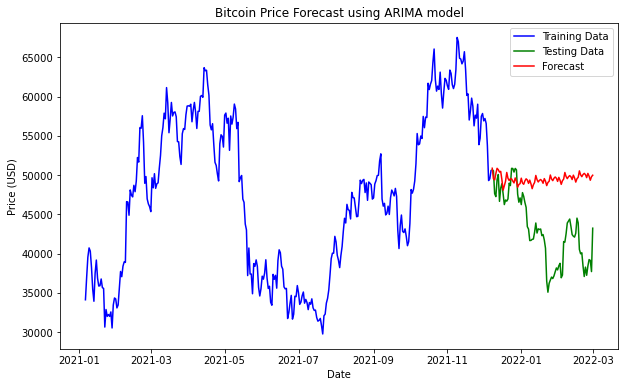

In [88]:
#plot the forecasted values
plt.figure(figsize=(10,6))
plt.plot(train.index,train['close'],label='Training Data',color='b')
plt.plot(test.index,test['close'],label='Testing Data',color='g')
plt.plot(test.index,arima_forecast,label='Forecast',color='r')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Price Forecast using ARIMA model')
plt.legend()
plt.show()

In [93]:
#compare the root mean square errors

rmse_values = {'SARIMA': rmse,
              'Exponential Smoothing': exp_rmse,
              'Prophet': p_rmse,
              'ARIMA': a_rmse}

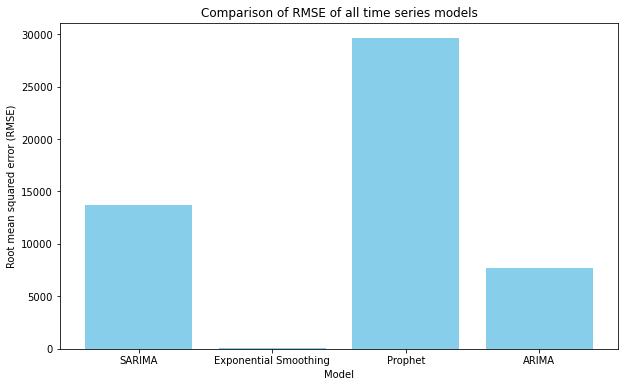

In [94]:
#create a bar plot for the RMSE scores

plt.figure(figsize=(10,6))
plt.bar(rmse_values.keys(),rmse_values.values(),color='skyblue')
plt.xlabel('Model')
plt.ylabel('Root mean squared error (RMSE)')
plt.title('Comparison of RMSE of all time series models')
plt.show()